In [1837]:
from typing import *
from copy import deepcopy
from math import ceil
import math

In [1838]:
class Matrix_Operations:
    def __init__(
            self, N: int, M: int, matrix: list[list[any]] #На вход классу подаются размерность матрицы и сама матрица
    ):
        self.N = N
        self.M = M
        self.matrix = matrix

    #Функция для суммирования двух матриц
    def sum_matrix(self,
                   matrix1: list[list[any]],
                   matrix2: list[list[any]]) -> list[list[any]]:

        #Проверяем, одинаковые ли структуры у двух матриц
        if len(matrix1) != len(matrix2) or len(matrix1[0]) != len(matrix2[0]):
            return 0

        matrix3 = [[0] * len(matrix1[0]) for _ in range(len(matrix1))]
        for i in range(len(matrix1)):
            for j in range(len(matrix1[0])):
                matrix3[i][j] = matrix1[i][j] + matrix2[i][j]

        return matrix3

    #Функция для произведения двух матриц
    def multiplication_matrix(self,
                   matrix1: list[list[any]],
                   matrix2: list[list[any]]) -> list[list[any]]:

         #Проверяем на равенство столбцов одного и строк другого
        if len(matrix1[0]) != len(matrix2):
            return 0

        #Инициализация итоговой матрицы
        matrix3 = [[0] * (len(matrix2[0])) for _ in range(len(matrix1))]

        for i in range(len(matrix1)):
            for j in range(len(matrix2[0])):
                for k in range(len(matrix2)):
                    matrix3[i][j] += matrix1[i][k] * matrix2[k][j]
        return matrix3

    #Функция для произведения скаляра на матрицу
    def multiplication_skal_matrix(self,
                                   matrix: list[list[any]],
                                   skal: any) -> list[list[any]]:

        for i in range(len(matrix)):
            for j in range(len(matrix[0])):
                matrix[i][j] *= skal
        return matrix

    #Функция по поиску определителя матрицы
    def det(self, matrix: list[list[any]]) -> any:

        #Для нахождения определителя матрица должна быть квадратной
        if len(matrix) != len(matrix[0]):
            return 0

        #Функция для рекурсии - реализация Минора
        def det_recursion(matrix: list[list[any]]) -> any:

            #Если условие выполняется, значит мы дошли до "конца" рекурсивного вызова
            if len(matrix) == 1:
                return matrix[0][0]

            summ = 0
            for i in range(len(matrix[0])):
                M = [row[:i] + row[i + 1:] for row in matrix[1:]]
                elem = ((-1) ** i) * matrix[0][i] * det_recursion(M)
                summ += elem

            #Возвращаем промежуточную сумму
            return summ

        summ = det_recursion(matrix)
        #Возвращаем итоговую сумму
        return summ

In [1839]:
N, M = 0, 0
matrix_operations = Matrix_Operations(N, M, [])

In [1840]:
def check_trivial(vec):
  flag = True
  for num in vec:
    if float(num) != 0.0:
      flag = False
      break
  return flag

In [1841]:
def gauss_solver(A: list[list], b: list, delta=1e-6) -> list[list]:
  # расширяем матрицу
  for i in range(len(A)):
    A[i].append(b[i])

  # применяем метод Гаусса сверху вниз, приводим к ступ. виду
  for i in range(len(A)):
    max_el = -2**63
    row = 0
    for j in range(i, len(A)):
      if (A[j][i] < 0 or A[j][i] > 0) and A[j][i] > max_el:
        max_el = A[j][i]
        row = j

    if (max_el < 0 or max_el > 0) and max_el > -2**63:
      A[row], A[i] = A[i], A[row]
    else:
      continue

    el = A[i][i]
    if not(el < 0 or el > 0):
      continue
    for j in range(i + 1, len(A)):
      if A[j][i] == 0:
        continue
      a = A[j][i] / el
      for k in range(i, len(A[i])):
        A[j][k] -= A[i][k] * a
        if abs(A[j][k] - round(A[j][k])) < delta:
          A[j][k] = round(A[j][k])
        elif abs(A[j][k] - ceil(A[j][k])) < delta:
          A[j][k] = ceil(A[j][k])

  # применяем метод Гаусса снизу вверх, чтобы занулить как можно больше коэффициентов
  for i in range(len(A) - 1, -1, -1):
    el = 0
    col = 0
    for j in range(len(A[i]) - 1):
      if A[i][j] < 0 or A[i][j] > 0:
        el = A[i][j]
        col = j
        break

    if el == 0:
      continue
    for j in range(i - 1, -1, -1):
      if not(A[j][col] < 0 or A[j][col] > 0):
        continue
      a = A[j][col] / el
      for k in range(col, len(A[i])):
        A[j][k] -= A[i][k] * a
        if abs(A[j][k] - round(A[j][k])) < delta:
          A[j][k] = round(A[j][k])
        elif abs(A[j][k] - ceil(A[j][k])) < delta:
          A[j][k] = ceil(A[j][k])

  # делим все строки на первый ненулевой элемент, дабы упростить вычисления
  for i in range(len(A)):
    el = 0
    for j in range(len(A[i])):
      if A[i][j] < 0 or A[i][j] > 0:
        el = A[i][j]
        break
    if not(el < 0 or el > 0):
      continue
    for j in range(len(A[i])):
      A[i][j] /=  el

  for row in A:
    flag = True
    for i in range(len(row) - 1):
      if row[i] != 0:
        flag = False
        break
    if flag:
      if row[-1] < 0 or row[-1] > 0:
        raise ValueError("The system is incompatible")
      pass

  # определяем свободные переменные
  free_vars = [i for i in range(len(A[0]) - 1)]
  dependent_vars = []
  for i in range(len(A)):
    for j in range(len(A[i]) - 1):
      if A[i][j] < 0 or A[i][j] > 0:
        free_vars.remove(j)
        dependent_vars.append(j)
        break

  x = list()
  if len(free_vars) > 0:
    for var in free_vars:
      vector = [0 for i in range(len(A[0]) - 1)]
      for i in range(len(A)):
        dep = -100
        for j in range(len(A[i]) - 1):
          if j not in free_vars and (A[i][j] < 0 or A[i][j] > 0):
            dep = j
          elif j == var and dep != -100:
            vector[j] = 1
            vector[dep] = -A[i][j]
      if not check_trivial(vector):
        x.append(vector)

    vector = [0 for i in range(len(A[0]) - 1)]
    for var in dependent_vars:
      vector[var] = A[var][-1]
    if not check_trivial(vector):
      x.append(vector)

  else:
    v = []
    for i in range(len(A)):
      v.append(A[i][-1])
    if not check_trivial(v):
      x.append(v)

  return x

In [1842]:
def center_data(X: list[list]) -> list[list]:
  """
  Вход: матрица данных X (n×m)
  Выход: центрированная матрица X_centered (n×m)
  """
  M = deepcopy(X)
  for i in range(len(M[0])):
    mean = 0
    for j in range(len(M)):
      mean += M[j][i]
    mean /= len(M)
    for j in range(len(M)):
      M[j][i] -= mean
  return M

In [1843]:
def transp(matrix):
  new_matrix = [[matrix[j][i] for j in range(len(matrix))] for i in range(len(matrix[0]))]
  return new_matrix

In [1844]:
def covariance_matrix(X_centered: list[list]) -> list[list]:
  """
  Вход: центрированная матрица X_centered (n×m)
  Выход: матрица ковариаций C (m×m)
  """
  M = deepcopy(X_centered)
  coef = 1 / (len(M) - 1)

  M_T = transp(M)
  M_M_T = matrix_operations.multiplication_matrix(M_T, M)
  for i in range(len(M_M_T)):
    for j in range(len(M_M_T)):
      M_M_T[i][j] *= coef

  return M_M_T

In [1845]:
def lambda_det(lambd, matrix):
    I_lambd = [[-lambd if i == j else 0 for j in range(len(matrix[0]))] for i in range(len(matrix))]
    A = matrix_operations.sum_matrix(matrix, I_lambd)
    return matrix_operations.det(A)

def bisection(matrix, a, b, tol):
  f_a = lambda_det(a, matrix)
  f_b = lambda_det(b, matrix)
  if f_a * f_b > 0:
    return None

  while abs(b - a) > tol:
    c = (a + b) / 2
    f_c = lambda_det(c, matrix)
    if abs(f_c) < tol:
      return c
    elif f_a * f_c < 0:
      b = c
      f_b = f_c
    else:
      a = c
      f_a = f_c
  return (a + b) / 2

def find_eigenvalues(matrix, tol=1e-10):
  n = len(matrix)

  # вычисляем интервал по теореме Гершгорина
  min_left, max_right = 2**63, -2**63
  for i in range(len(matrix)):
    s = 0
    for j in range(len(matrix[0])):
      s += abs(matrix[i][j])
    s -= abs(matrix[i][i])

    left, right = matrix[i][i] - s, matrix[i][i] + s
    min_left, max_right = min(min_left, left), max(max_right, right)
  left, right = min_left, max_right

  intervals_amount = 1000
  step = abs(left - right) / intervals_amount
  eigenvalues = []
  found = set()

  for i in range(intervals_amount):
    a = left + i * step
    b = a + step
    f_a = lambda_det(a, matrix)
    f_b = lambda_det(b, matrix)
    if f_a * f_b < 0:
      root = bisection(matrix, a, b, tol)
      if root is not None:
        root_rounded = round(root, 6) # округляем корень
        if all(abs(root_rounded - ev) > tol for ev in found): # проверяем достаточно ли далеко он лежит от уже найденных, иначе он - дубликат
          found.add(root_rounded)
          eigenvalues.append(root)

  return eigenvalues

In [1846]:
def find_eigenvectors(C: list[list], eigenvalues) -> list[float]:
  eigenvectors = []
  for eigenval in eigenvalues:
    lambda_I = [[-eigenval if i == j else 0 for j in range(len(C[0]))] for i in range(len(C))]
    C_lambda_I = matrix_operations.sum_matrix(C, lambda_I)

    vectors = gauss_solver(C_lambda_I, [0 for i in range(len(C_lambda_I))])
    eigenvectors.extend(vectors)

  return eigenvectors

In [1847]:
def explained_variance_ratio(eigenvalues: List[float], k: int) -> float:
  """
  Вход:
  eigenvalues: список собственных значений
  k: число компонент
  Выход: доля объяснённой дисперсии
  """
  eigenvalues.sort(reverse=True)
  return sum(eigenvalues[:k]) / sum(eigenvalues)

In [1848]:
def pca(X: list[list], k: int) -> Tuple[list[list], float]:
  """
  Вход:
  X: матрица данных (n×m)
  k: число главных компонент
  Выход:
  X_proj: проекция данных (n×k)
  : доля объяснённой дисперсии
  """
  X_centered = center_data(X)
  X_cov = covariance_matrix(X_centered)

  eigenvalues = find_eigenvalues(X_cov)
  eigenvectors = find_eigenvectors(X_cov, eigenvalues)

  sorting = sorted(zip(eigenvalues, eigenvectors), key=lambda x: x[0], reverse=True)
  eigenvalues, eigenvectors = zip(*sorting)
  eigenvalues, eigenvectors = list(eigenvalues), list(eigenvectors)

  # получаем матрицу айгенвекторов с первыми k компонентами
  V = [eigenvectors[i][:k] for i in range(len(X[0]))]
  X_proj = matrix_operations.multiplication_matrix(X, V)

  X_recon = matrix_operations.multiplication_matrix(X_proj, transp(V))

  explained_variance = explained_variance_ratio(eigenvalues, k)
  return X_proj, explained_variance, X_recon

In [1849]:
from matplotlib.figure import Figure
def plot_pca_projection(X_proj) -> Figure:
  """
  Вход: проекция данных X_proj (n×2)
  Выход: объект Figure из Matplotlib
  """
  fig = Figure(figsize=(8, 6))
  ax = fig.add_subplot(1, 1, 1)

  pc1 = [X_proj[i][0] for i in range(len(X_proj))]
  pc2 = [X_proj[i][1] for i in range(len(X_proj))]

  scatter = ax.scatter(pc1, pc2, s=20)
  ax.set_xlabel("Principal Component 1")
  ax.set_ylabel("Principal Component 2")
  ax.set_title("PCA")

  return fig

In [1850]:
from sklearn import datasets

iris = datasets.load_iris()
A = iris.data.tolist()

0.9776852062824762


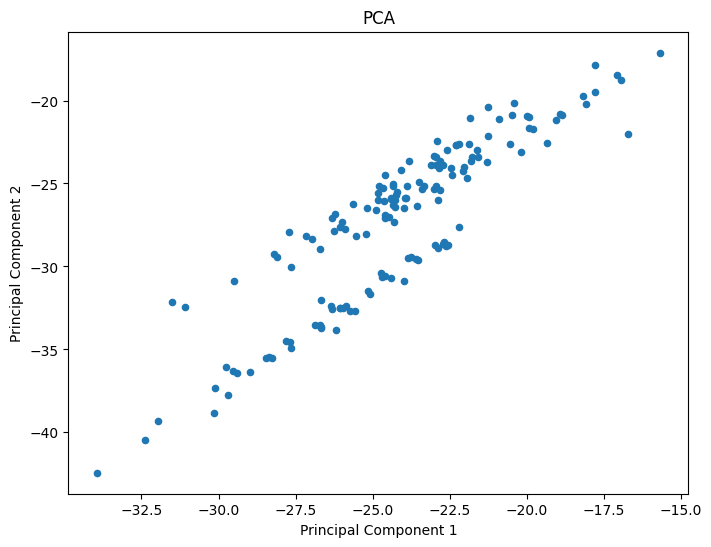

In [1851]:
make_pca = pca(A, 2)
A_proj = make_pca[0]
exp_variance = make_pca[1]
print(exp_variance)
A_recon = make_pca[2]
plot_pca_projection(A_proj)

In [1852]:
def reconstruction_error(X_orig, X_recon) -> float:
  """
  Вход:
  X_orig: исходные данные (n×m)
  X_recon: восстановленные данные (n×m)
  Выход: среднеквадратическая ошибка MSE
  """
  n, m = len(X_orig), len(X_orig[0])
  s = 0
  for i in range(n):
    for j in range(m):
      s += (X_orig[i][j] - X_recon[i][j]) ** 2

  s /= n * m
  return s

reconstruction_error(A, A_recon)

57266.98300603971